In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

import numpy as np
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

In [56]:

data.columns

Index(['Unnamed: 0', 'CasesPerCapita', 'uasid', 'cl014_240', 'cl014_250',
       'cl014_348', 'immigrant_gen_0 Non-immigrant',
       'immigrant_gen_1 First generation immigrant',
       'immigrant_gen_2 Second generation immigrant',
       'immigrant_gen_3 Third generation immigrant', 'hhincome', 'education',
       'immigrant_status', 'age', 'gender', 'race_1 White Only',
       'race_2 Black Only', 'race_3 American Indian or Alaska Native Only',
       'race_4 Asian Only', 'race_5 Hawaiian/Pacific Islander Only',
       'race_6 Mixed', 'educ_c_8', 'educ_c_12', 'educ_c_14', 'educ_c_16',
       'educ_c_18', 'educ_c_20', 'hhi_c_0', 'hhi_c_20', 'hhi_c_40', 'hhi_c_60',
       'hhi_c_80', 'hhi_less_lowincome', 'hhi_less_above25k',
       'educ_less_loweducation', 'educ_less_highschool and above',
       'cases_quartiles', 'case1', 'case2', 'case3', 'case4', 'case5', 'race'],
      dtype='object')

In [107]:
data = pd.read_csv('rforest_data.csv')

data['immigrant_status'] = data['immigrant_status'].str[0].astype(float)
data['immigrant'] = ((data['immigrant_gen_1 First generation immigrant'] == 1) | (data['immigrant_gen_2 Second generation immigrant'] == 1)) 

data['race_nonwhite'] = (data['race_1 White Only'] != 1)

data['cases_quartiles'] = pd.qcut(data['CasesPerCapita'], 5, labels = ['case1', 'case2', 'case3', 'case4', 'case5'])
data = data.join(pd.get_dummies(data['cases_quartiles']))

X = data[['CasesPerCapita', 'gender', 'age', 'hhincome', 'education',
          'immigrant', 'race_nonwhite'
#       'immigrant_gen_0 Non-immigrant',
#     'immigrant_gen_1 First generation immigrant',
#    'immigrant_gen_2 Second generation immigrant',
#    'immigrant_gen_3 Third generation immigrant',
#                     'race_1 White Only', 'race_2 Black Only',
#        'race_3 American Indian or Alaska Native Only', 'race_4 Asian Only',
#        'race_5 Hawaiian/Pacific Islander Only', 'race_6 Mixed',
         ]]

y = data['cl014_348']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [103]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rf, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()

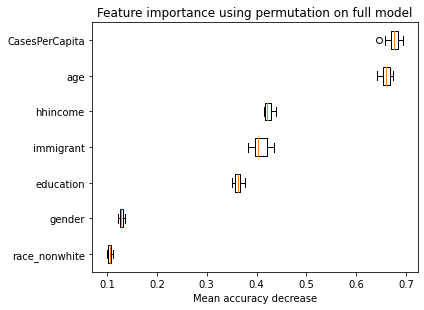

In [104]:
fig, ax = plt.subplots()
ax.boxplot(
    result.importances[sorted_idx].T, vert=False, labels=X_train.columns[sorted_idx]
)
fig.tight_layout()
plt.title('Feature importance using permutation on full model')
plt.xlabel('Mean accuracy decrease')
plt.show()

In [ ]:
rf = RandomForestRegressor(n_estimators = 100, random_state=0)
rf.fit(X_train,y_train)

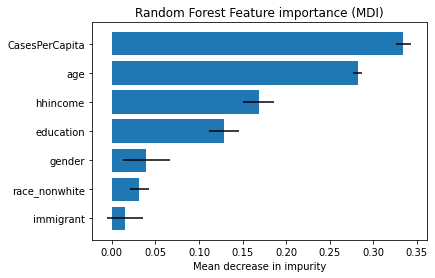

In [105]:
f_i = list(zip(X_train.columns,rf.feature_importances_))
f_i.sort(key = lambda x : x[1]) 
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

plt.barh([x[0] for x in f_i],[x[1] for x in f_i], xerr = std)
plt.xlabel('Mean decrease in impurity')
plt.title('Random Forest Feature importance (MDI)')

plt.show()